In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [47]:
c_party = 'PARTY15'
c_educ = 'EDUC'
c_vote = 'VOTE1'

v_party_sp = 2

v_educ_no_school = 10
v_educ_obligatory = 21
v_educ_transition = 22
v_educ_general = 31
v_educ_lehre = 32
v_educ_matur = 33
v_educ_not_tertiary = 40
v_educ_higher = 51
v_educ_uni = 52
v_educ_doc = 50

v_vote_yes = 1
v_vote_no = 2

In [48]:
parties = [
    'SVP Schweizerische Volkspartei',
    'SP Sozialdemokratische Partei der Schweiz',
    'FDP FDP.Die Liberalen',
    'CVP Christlichdemokratische Volkspartei',
    'GPS und GP Grüne Partei der Schweiz',
    'EVP Evangelische Volkspartei',
    'Lega dei Ticinesi',
    'CSP Christlich-soziale Partei',
    'GLP Grünliberale Partei',
    'BDP Bürgerlich-Demokratische Partei',
    'Alternative Linke / Alternative Liste / Partei der Arbeit / solidaritéS',
    'EDU Eidgenössisch-Demokratische Union',
    'Piratenpartei',
    'Mouvement Citoyens Romand',
    'eindeutig andere Partei',
    'keine Partei',
    'None',
    'Ich würde nicht teilnehmen',
    'Die Mitte',
]

In [49]:
df_r_values = pd.DataFrame([], columns=['title', 'R-value', 'R2-value', 'p-value'])
df_r_values.to_csv('r_values.csv')

def regression(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, q = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, q

def scatter_plot(
    x, 
    y, 
    file_name='test', 
    title="Title", 
    x_label="x-axis", 
    y_label="y-axis", 
    x_start=None, 
    x_end=None, 
    y_start=None, 
    y_end=None, 
    regression=True
):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)
    
    ax.set_axisbelow(True)
    ax.grid(axis='x', color='#ddd')
    ax.scatter(x, y, s=20, c='black')

    x_delta = np.max(x) - np.min(x)
    x_pad = 0.05 * x_delta
    x_start = x_start or np.min(x) - x_pad
    x_end = x_end or np.max(x) + x_pad

    res = stats.linregress(x, y)
    f = open('r_values.csv', 'a')
    f.write(f",{title},{res.rvalue:.3f},{res.rvalue**2:.3f},{res.pvalue:.5f}\n")
    f.close()
    
    if regression:
        x_vals = np.linspace(x_start, x_end, num=500)
        y_vals = res.slope * x_vals + res.intercept
        ax.plot(x_vals, y_vals, c='#ccc', linewidth=2)

    ax.set_xbound(x_start, x_end)
    ax.set_ybound(y_start, y_end)
    ax.set_title(title, pad=20)
    ax.set_xlabel(x_label, labelpad=5)
    ax.set_ylabel(y_label, labelpad=5)

    fig.savefig(f"images/{file_name}.jpg", dpi=200, format='jpg')

/Users/timo/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/timo/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/timo/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/timo/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/timo/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/timo/opt/anacond

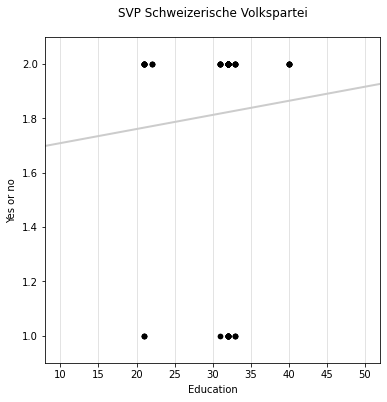

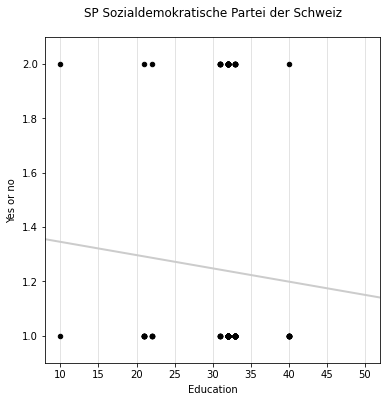

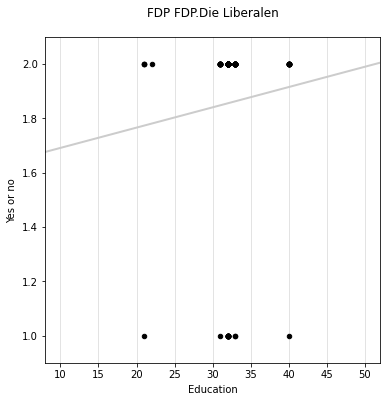

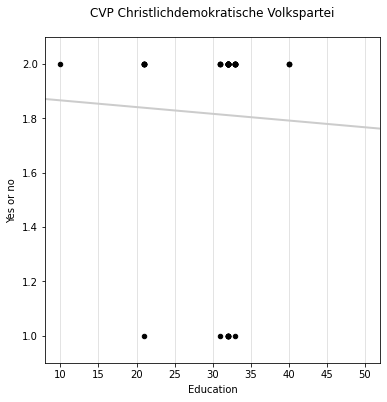

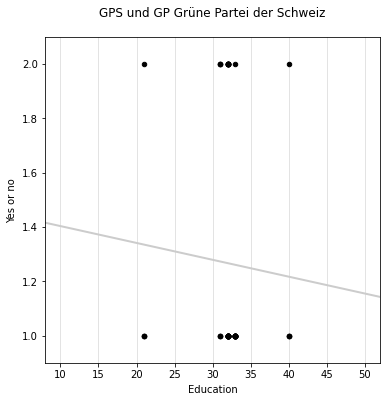

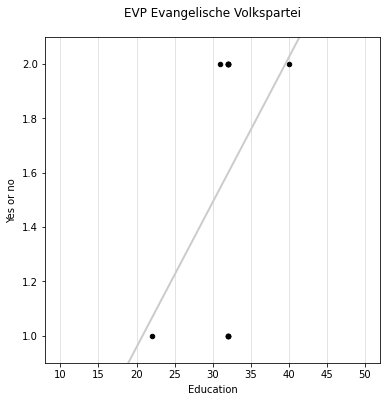

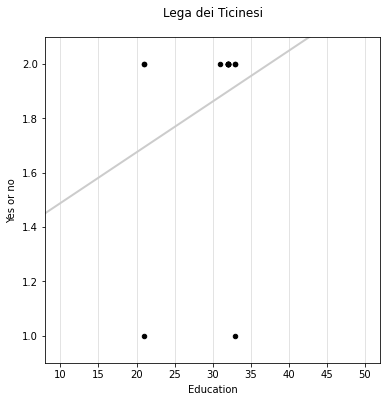

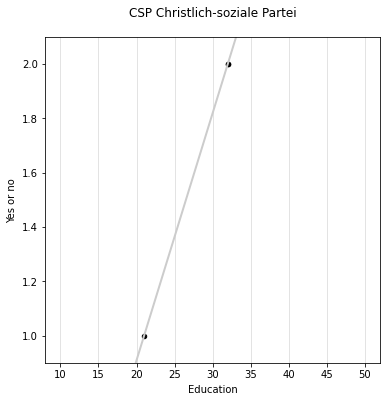

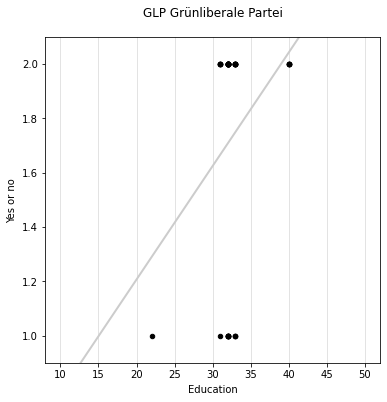

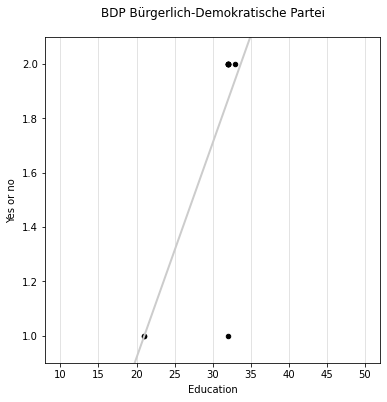

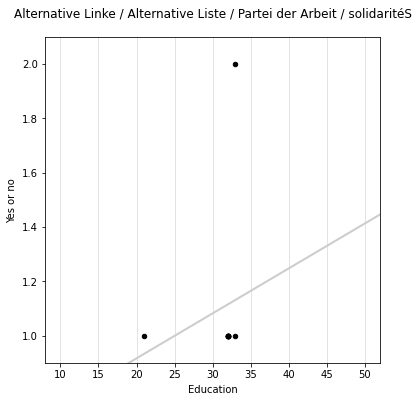

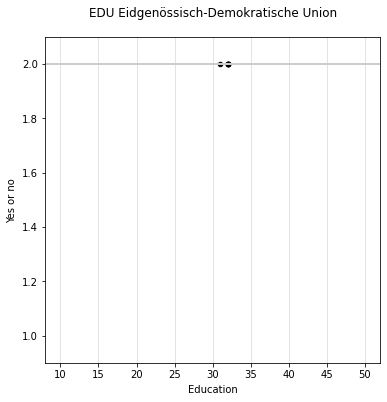

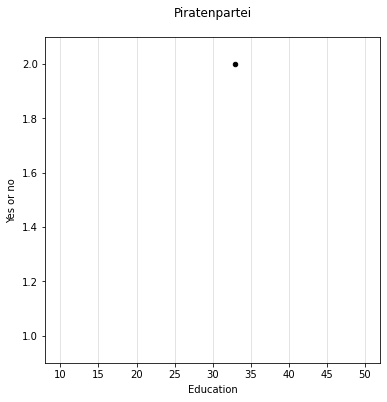

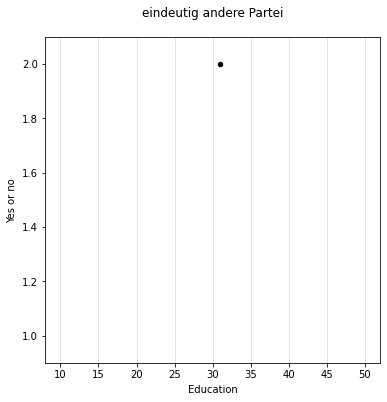

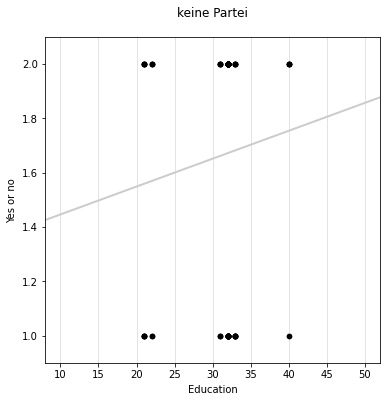

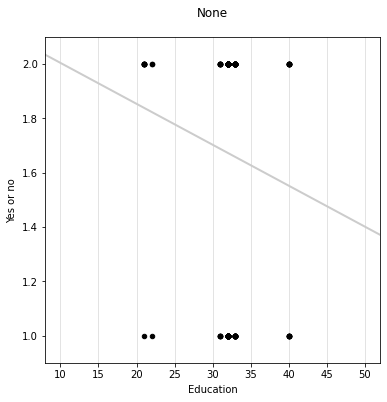

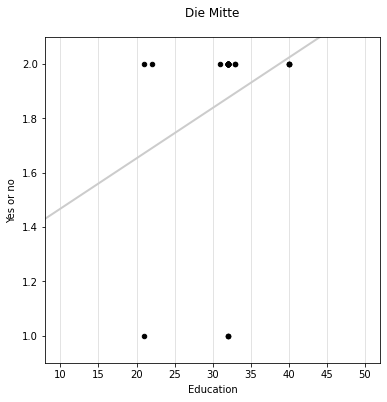

In [50]:
df = pd.read_csv('dataset.csv')


for idx, party in enumerate(parties):
    v_party = idx + 1
    df_party = df[df[c_party] == v_party]
    df_party = df_party[(df_party[c_educ] >= v_educ_no_school) & (df_party[c_educ] <= v_educ_doc)]
    df_party = df_party[(df_party[c_vote] == v_vote_yes) | (df_party[c_vote] == v_vote_no)]

    if (df_party.size > 0):
        x = df_party[c_educ].to_numpy()
        y = df_party[c_vote].to_numpy()

        scatter_plot(
            x, 
            y,
            file_name=f"party_{v_party}",
            x_label='Education',
            y_label='Yes or no',
            x_start=v_educ_no_school - 2,
            x_end=v_educ_doc + 2,
            y_start=v_vote_yes - 0.1,
            y_end=v_vote_no + 0.1,
            title=party,
        )
